# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
       
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | sant antoni de portmany
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | mosjoen
Processing Record 8 of Set 1 | zhezqazghan
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | butembo
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | martuk
Processing Record 13 of Set 1 | yeniseysk
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | miyanoura
City not found. Skipping...
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | kapuskasing
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | hawaiian paradise 

Processing Record 39 of Set 4 | kingston
Processing Record 40 of Set 4 | ivolginsk
Processing Record 41 of Set 4 | stanley
Processing Record 42 of Set 4 | saipan
Processing Record 43 of Set 4 | bucerias
Processing Record 44 of Set 4 | flin flon
Processing Record 45 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 46 of Set 4 | enewetak
Processing Record 47 of Set 4 | guiuan
Processing Record 48 of Set 4 | rongelap
Processing Record 49 of Set 4 | labrador city
Processing Record 0 of Set 5 | constantia
Processing Record 1 of Set 5 | quellon
Processing Record 2 of Set 5 | ambon
Processing Record 3 of Set 5 | tosontsengel
Processing Record 4 of Set 5 | mirny
Processing Record 5 of Set 5 | baukau
Processing Record 6 of Set 5 | fayroz koh
Processing Record 7 of Set 5 | simanggang
Processing Record 8 of Set 5 | taltal
Processing Record 9 of Set 5 | uacu cungo
Processing Record 10 of Set 5 | constitucion
Processing Record 11 of Set 5 | penzance
Processing Record 12 of Set 5 |

Processing Record 31 of Set 8 | mendefera
Processing Record 32 of Set 8 | malvan
Processing Record 33 of Set 8 | rafsanjan
Processing Record 34 of Set 8 | kollam
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | vadso
Processing Record 37 of Set 8 | cova figueira
Processing Record 38 of Set 8 | itaituba
Processing Record 39 of Set 8 | numata
Processing Record 40 of Set 8 | breckenridge
Processing Record 41 of Set 8 | greenland
Processing Record 42 of Set 8 | salym
Processing Record 43 of Set 8 | grand falls-windsor
Processing Record 44 of Set 8 | angaur state
Processing Record 45 of Set 8 | merizo village
Processing Record 46 of Set 8 | vytegra
Processing Record 47 of Set 8 | mana
Processing Record 48 of Set 8 | esperantinopolis
Processing Record 49 of Set 8 | brisas de zicatela
Processing Record 0 of Set 9 | aguazul
Processing Record 1 of Set 9 | nagqu
Processing Record 2 of Set 9 | manismata
Processing Record 3 of Set 9 | muli
Processing Record 4 of Set 9 | tarou

Processing Record 22 of Set 12 | wallenhorst
Processing Record 23 of Set 12 | ayorou
Processing Record 24 of Set 12 | turaif
Processing Record 25 of Set 12 | ust'-kulom
Processing Record 26 of Set 12 | cavelossim
Processing Record 27 of Set 12 | chillicothe
Processing Record 28 of Set 12 | borogontsy
Processing Record 29 of Set 12 | atasu
Processing Record 30 of Set 12 | dali
Processing Record 31 of Set 12 | terme
Processing Record 32 of Set 12 | kailua-kona
Processing Record 33 of Set 12 | hayma'
City not found. Skipping...
Processing Record 34 of Set 12 | torbeyevo
Processing Record 35 of Set 12 | lionel town
Processing Record 36 of Set 12 | machico
Processing Record 37 of Set 12 | masaya sur
Processing Record 38 of Set 12 | linden
Processing Record 39 of Set 12 | saldanha
Processing Record 40 of Set 12 | sabzevar
Processing Record 41 of Set 12 | kyzyl
Processing Record 42 of Set 12 | sur
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-37.29,100,89,0.55,RU,1703210143
1,bethel,41.3712,-73.4140,-1.40,53,0,2.57,US,1703209918
2,sant antoni de portmany,38.9807,1.3036,15.54,81,0,2.57,ES,1703210144
3,edinburgh of the seven seas,-37.0676,-12.3116,14.26,74,12,7.04,SH,1703210144
4,grytviken,-54.2811,-36.5092,3.99,88,58,5.23,GS,1703210145


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-37.29,100,89,0.55,RU,1703210143
1,bethel,41.3712,-73.4140,-1.40,53,0,2.57,US,1703209918
2,sant antoni de portmany,38.9807,1.3036,15.54,81,0,2.57,ES,1703210144
3,edinburgh of the seven seas,-37.0676,-12.3116,14.26,74,12,7.04,SH,1703210144
4,grytviken,-54.2811,-36.5092,3.99,88,58,5.23,GS,1703210145


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

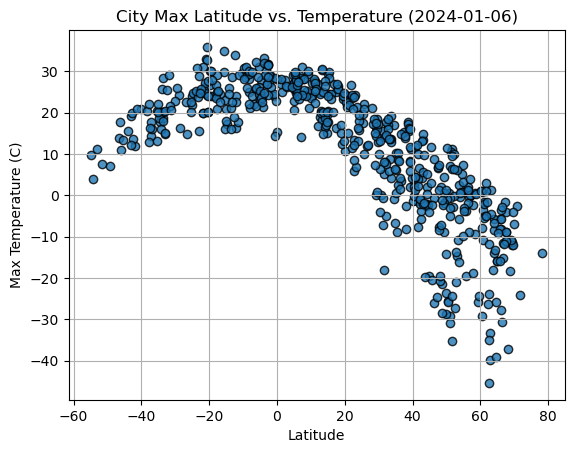

In [3]:

# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

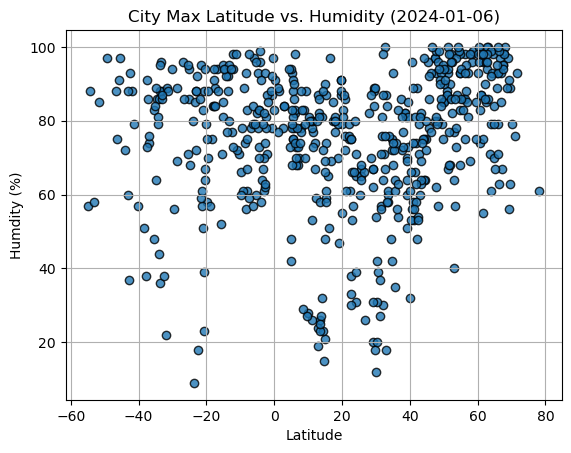

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humdity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

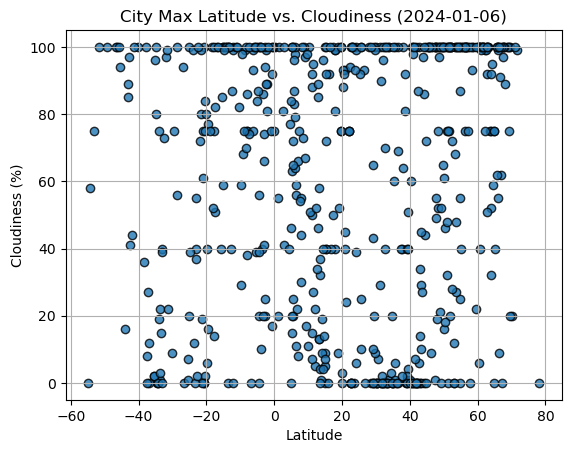

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

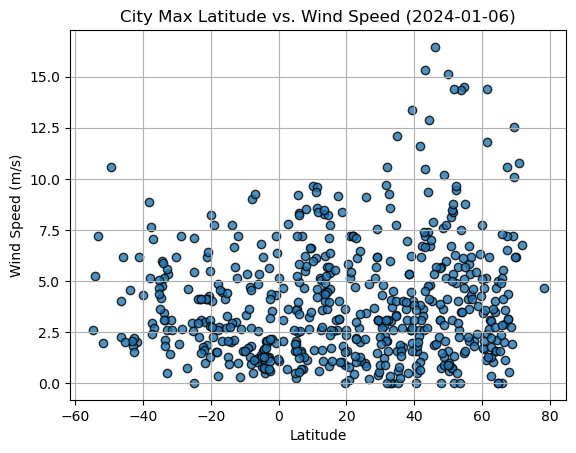

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-37.29,100,89,0.55,RU,1703210143
1,bethel,41.3712,-73.4140,-1.40,53,0,2.57,US,1703209918
2,sant antoni de portmany,38.9807,1.3036,15.54,81,0,2.57,ES,1703210144
6,mosjoen,65.8360,13.1908,-5.71,93,100,0.00,NO,1703210146
7,zhezqazghan,47.7833,67.7667,-7.68,93,100,0.00,KZ,1703210147


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,14.26,74,12,7.04,SH,1703210144
4,grytviken,-54.2811,-36.5092,3.99,88,58,5.23,GS,1703210145
5,atafu village,-8.5421,-172.5159,29.26,74,99,4.71,TK,1703210145
8,port-aux-francais,-49.3500,70.2167,7.10,97,100,10.60,TF,1703210147
13,ancud,-41.8697,-73.8203,11.97,88,44,2.00,CL,1703210150


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8336010123374773


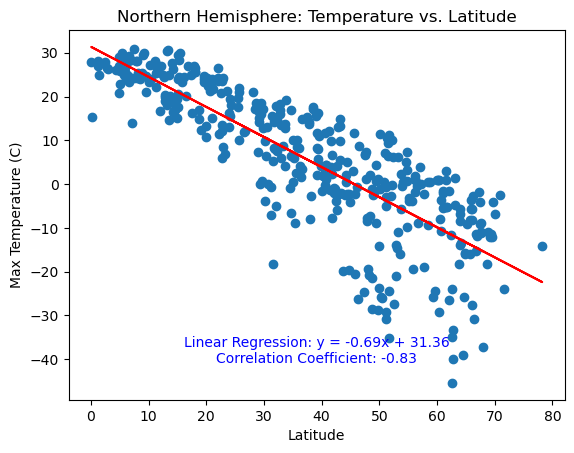

In [18]:
# Linear regression on Northern Hemisphere
# Plot the scatter plot for Temperature vs. Latitude
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plot the linear regression line
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# Display linear regression equation
plt.annotate(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}",
             xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Show the plot
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: 0.6597055000769979


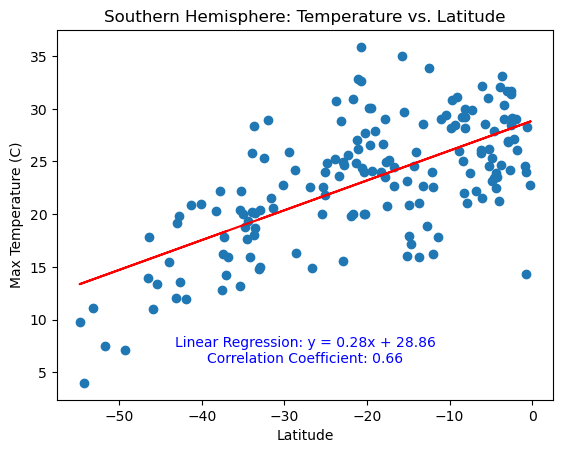

In [20]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
# Plot the scatter plot for Temperature vs. Latitude
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Plot the linear regression line
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

# Display linear regression equation
plt.annotate(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}",
             xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Show the plot
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** There is a very strong correlation between latitude and temperature in the northern hemisphere and a moderately strong relationship between latitude and temperature in the south. Possibly this is due to there being less cities at high latitude in the southern hemisphere, which skews the linear regression line, whilst there is a consistent amount of cities across all latiudes in the northern hemisphere all the way to 80 latitude, giving a tighter cluster and better linear regression.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34766656095786064


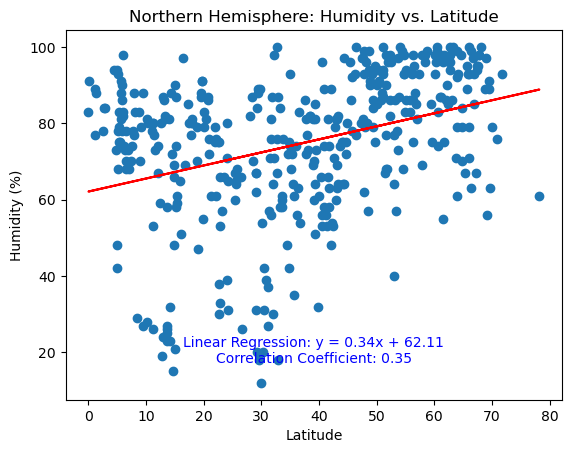

In [27]:
# Northern Hemisphere
# Plot the scatter plot for Humidity vs. Latitude
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Plot the linear regression line
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# Display linear regression equation
plt.annotate(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}",
             xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Show the plot
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: 0.09592207341514669


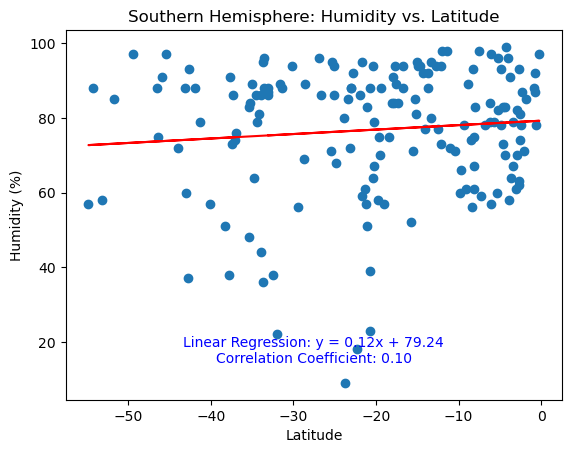

In [28]:
# Southern Hemisphere
# Plot the scatter plot for Humidity vs. Latitude
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Plot the linear regression line
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

# Display linear regression equation
plt.annotate(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}",
             xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Show the plot
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** There is a very poor correlation between latitude and humidty % for both the southern and northern hemispheres, in fact the linear regression is the opposite of what you'd expect for the northern hemisphere: we would expect higher humidities at the equator and less humidity towards the poles. 

Perhaps additional data, such as Elevation of the cities, could help provide better insights.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19586059222447022


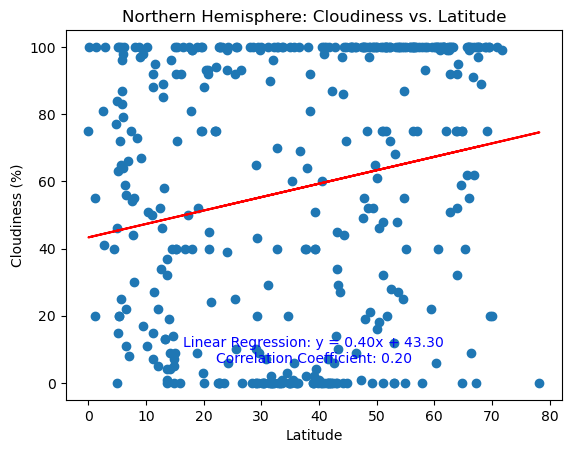

In [29]:
# Northern Hemisphere
# Plot the scatter plot for Cloudiness vs. Latitude
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Plot the linear regression line
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# Display linear regression equation
plt.annotate(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}",
             xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Show the plot
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: 0.1996086625593798


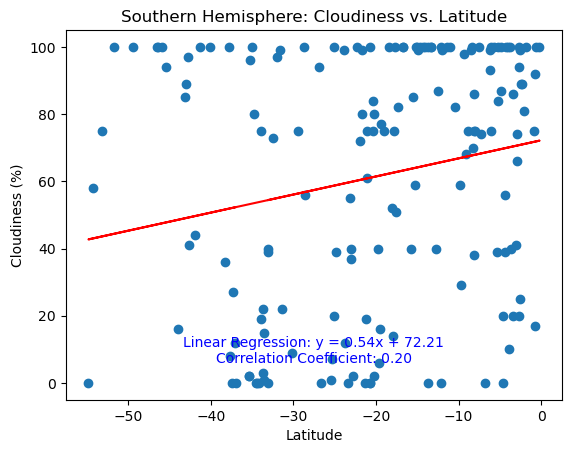

In [30]:
# Southern Hemisphere
# Plot the scatter plot for Humidity vs. Latitude
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Plot the linear regression line
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

# Display linear regression equation
plt.annotate(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}",
             xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Show the plot
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** Hard to interpret this as both in the N and S hemispheres there are a lot of values at 100 and 0 % cloudiness, which make it difficult to have a linear regression

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06721904040094769


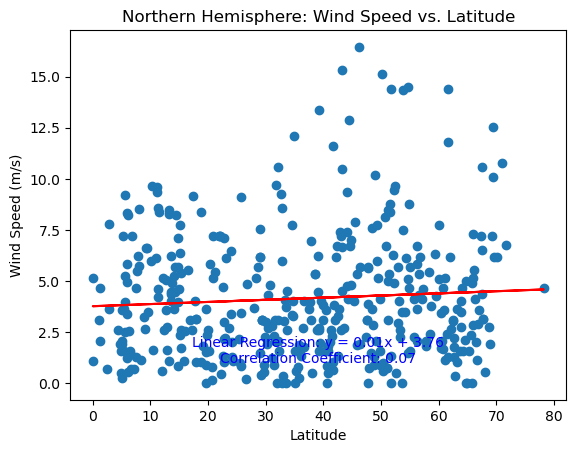

In [31]:
# Northern Hemisphere
# Plot the scatter plot for Cloudiness vs. Latitude
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Plot the linear regression line
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# Display linear regression equation
plt.annotate(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}",
             xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Show the plot
print(f"The r-value is: {r_value}")
plt.show()

The r-value is: -0.23209305073870204


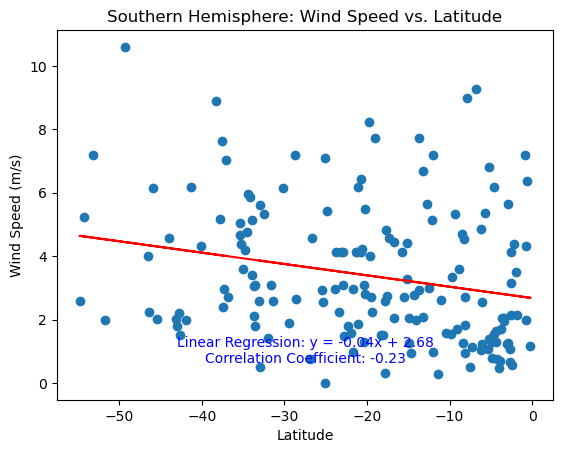

In [32]:
# Southern Hemisphere
# Plot the scatter plot for Humidity vs. Latitude
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Plot the linear regression line
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

# Display linear regression equation
plt.annotate(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}",
             xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Show the plot
print(f"The r-value is: {r_value}")
plt.show()

**Discussion about the linear relationship:** there is a very poor correlation between wind speed and latitude in both the north and south hemispheres
